<a href="https://colab.research.google.com/github/dhivya90m/Portfolio/blob/main/AIML_ML_Project_full_code_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 34.8 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 24.12.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2025.1.1 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
mlxtend 0.23.4 requires scikit-lear

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [4]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the warnings module to manage warning messages in Python.
import warnings

# Suppressing warnings of category FutureWarning to prevent messages about
# features or libraries that may change in the future.
warnings.filterwarnings("ignore", category=FutureWarning)

# Suppressing warnings of category UserWarning to avoid non-critical user-level warnings.
warnings.filterwarnings("ignore", category=UserWarning)

## Loading the dataset

In [3]:
# Mount on my drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# To read the data
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Machine Learning/PROJECT 2/Loan_Modelling.csv')
# A copy of the original dataset before performing any operations
data_copy = data.copy()

In [6]:
# To view the first 5 rows
print(data.head())

   ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


## Data Overview

* Observations
* Sanity checks

In [7]:
# Data Overview
print("Data Overview:")
print("------------------")
print("Shape of the dataset:", data.shape)  # Prints the number of rows and columns
print("\nData Types:")
print(data.dtypes)  # Prints the data type of each column
print("\nMissing Values:")
print(data.isnull().sum())  # Checks if there are any missing values in each column
print("\nSummary Statistics:")
print(data.describe())  # Gives the summary statistics of numerical columns

# Observations
print("\nObservations:")
# Check the first few rows of the dataset
print(data.head())

# Check the distribution of the target variable (Personal_Loan)
print("\nTarget Variable Distribution (Personal_Loan):")
print(data['Personal_Loan'].value_counts())  # Count of 0s and 1s in the target column

# Sanity Checks
print("\nSanity Checks:")
# Check for negative values in 'Income', 'Mortgage', 'CCAvg', etc. that don't make sense
print("Negative values in 'Income':", (data['Income'] < 0).sum())
print("Negative values in 'Mortgage':", (data['Mortgage'] < 0).sum())
print("Negative values in 'CCAvg':", (data['CCAvg'] < 0).sum())

# Ensure that categorical columns (like Education, Family, Online, etc.) have expected values
print("\nUnique values in 'Education':", data['Education'].unique())
print("Unique values in 'Family':", data['Family'].unique())
print("Unique values in 'Online':", data['Online'].unique())
print("Unique values in 'Securities_Account':", data['Securities_Account'].unique())

# Check if any values in categorical columns are missing or incorrect
print("\nMissing values in categorical columns:")
print(data[['Education', 'Family', 'Online', 'Securities_Account']].isnull().sum())

# Check for duplicates in the dataset
print("\nDuplicates in the dataset:")
print(data.duplicated().sum())

# Check for the distribution of 'Age' and 'Experience' for any outliers
print("\nAge Distribution (Min, Max, Median):")
print(data['Age'].describe())
print("\nExperience Distribution (Min, Max, Median):")
print(data['Experience'].describe())

# Sanity Check for 'CreditCard' column (since it's binary, check the values)
print("\nUnique values in 'CreditCard':", data['CreditCard'].unique())


Data Overview:
------------------
Shape of the dataset: (5000, 14)

Data Types:
ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

Missing Values:
ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

Summary Statistics:
                ID          Age   Experience       Income       ZIPCode  \
count  5000.000000  5000

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

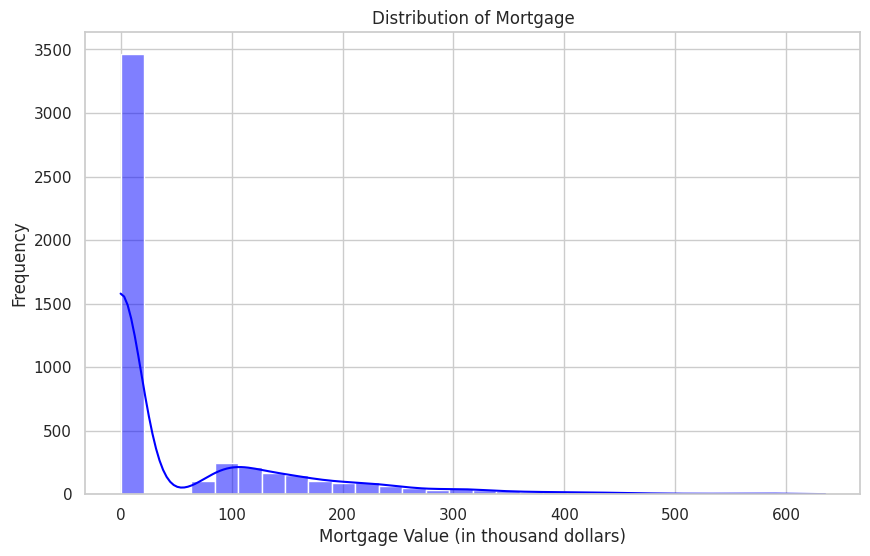

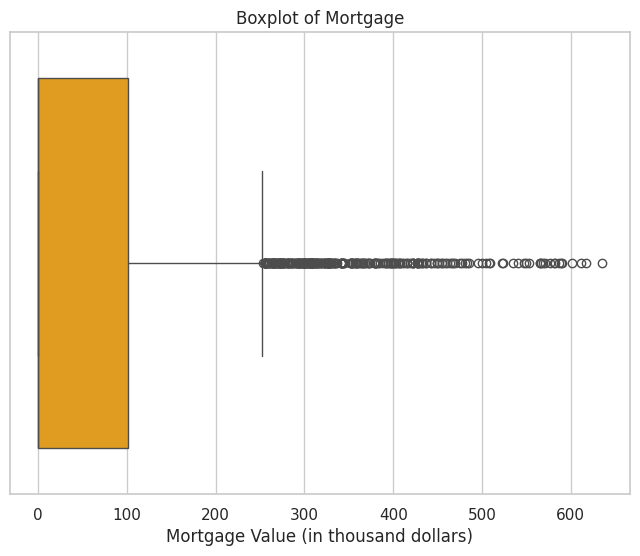

Number of customers with credit cards: 1470
Number of customers without credit cards: 3530


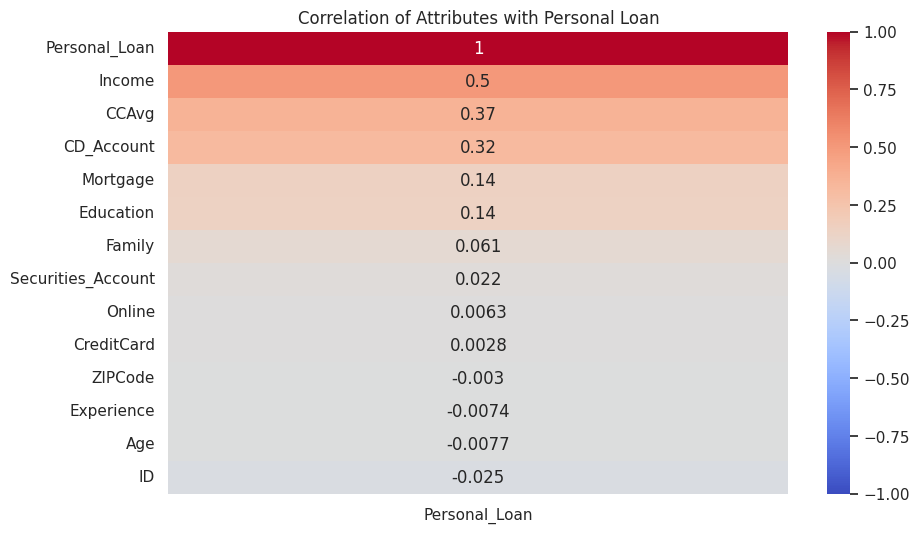

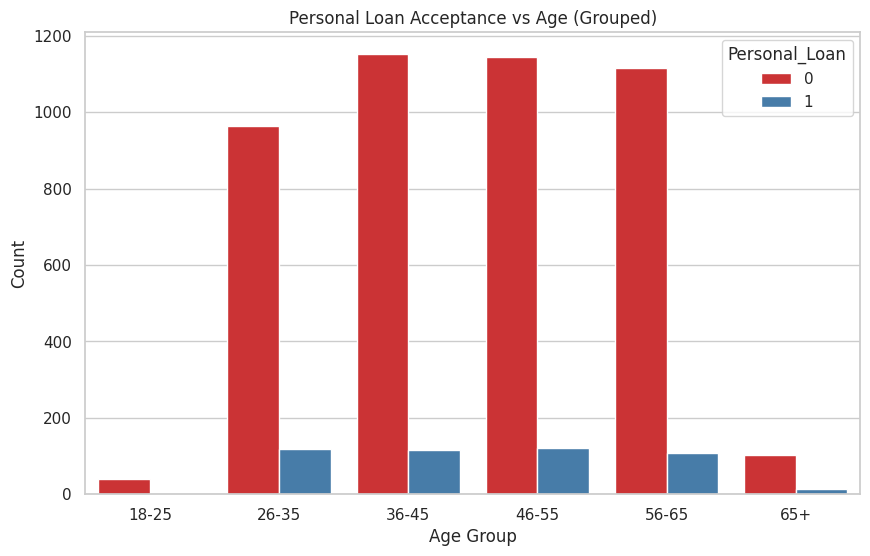

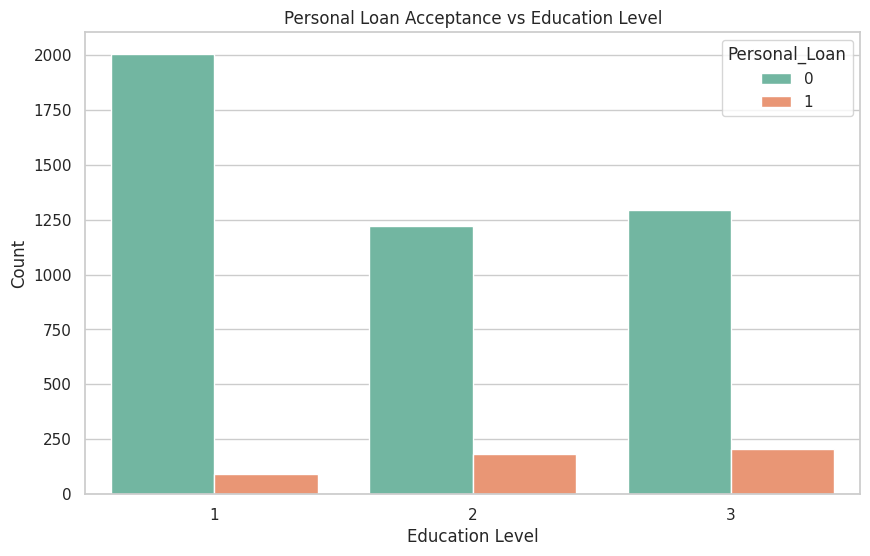

In [10]:
# Set the style for the plots
sns.set(style="whitegrid")

# 1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
plt.figure(figsize=(10,6))
sns.histplot(data['Mortgage'], kde=True, color='blue', bins=30)
plt.title('Distribution of Mortgage')
plt.xlabel('Mortgage Value (in thousand dollars)')
plt.ylabel('Frequency')
plt.show()

# Boxplot to check for outliers in 'Mortgage'
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Mortgage'], color='orange')
plt.title('Boxplot of Mortgage')
plt.xlabel('Mortgage Value (in thousand dollars)')
plt.show()

# 2. How many customers have credit cards?
credit_card_count = data['CreditCard'].value_counts()
print(f"Number of customers with credit cards: {credit_card_count[1]}")
print(f"Number of customers without credit cards: {credit_card_count[0]}")

# 3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
correlation_matrix = data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix[['Personal_Loan']].sort_values(by='Personal_Loan', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Attributes with Personal Loan')
plt.show()

# 4. How does a customer's interest in purchasing a loan vary with their age?
bins = [18, 25, 35, 45, 55, 65, 100]  # Customize the bins as needed
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
data['Age_Binned'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Plot the countplot with binned age
plt.figure(figsize=(10,6))
sns.countplot(x='Age_Binned', hue='Personal_Loan', data=data, palette='Set1')
plt.title('Personal Loan Acceptance vs Age (Grouped)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


# 5. How does a customer's interest in purchasing a loan vary with their education?
plt.figure(figsize=(10,6))
sns.countplot(x='Education', hue='Personal_Loan', data=data, palette='Set2')
plt.title('Personal Loan Acceptance vs Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()



## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

## Model Building

### Model Evaluation Criterion

*


### Model Building

## Model Performance Improvement

## Model Performance Comparison and Final Model Selection

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

___